In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


df = pd.read_csv('Retail_Transactions_2000.csv')

df


,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123
...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418


In [38]:
df.shape

(2000, 11)

In [39]:
df.columns

Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount'],
      dtype='object')

In [40]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [43]:
df.describe()

,Age,Quantity,Price,TotalAmount
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,44.679000,2.957000,2496.61000,7307.414500
std,15.179795,1.412143,1413.95187,5705.065758
min,18.000000,1.000000,100.00000,111.000000
25%,32.000000,2.000000,1239.00000,2756.250000
50%,45.000000,3.000000,2481.50000,5562.500000
75%,58.000000,4.000000,3695.50000,10751.250000
max,70.000000,5.000000,5000.00000,24950.000000


In [44]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df['City'] = df['City'].fillna(df['City'].mode()[0])

df = df.dropna(subset=['TransactionID', 'ProductCategory'])


In [45]:
df = df.drop_duplicates()

df['Gender'] = df['Gender'].str.strip().str.lower().replace({
    'male': 'Male', 'm': 'Male', 'female': 'Female', 'f': 'Female', 'other': 'Other'
})


df['Quantity'] = df['Quantity'].apply(lambda x: x if x > 0 else 1)
df['Price'] = df['Price'].apply(lambda x: x if x > 0 else df['Price'].median())


In [46]:
df['TotalAmount'] = df.apply(lambda row: row['Quantity']*row['Price'] if pd.isna(row['TotalAmount']) else row['TotalAmount'], axis=1)

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['Month'] = df['PurchaseDate'].dt.month
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()

bins = [0, 17, 25, 40, 60, 120]
labels = ['<18', '18-25', '26-40', '41-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)


In [47]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

for col in ['Gender', 'City', 'ProductCategory', 'PaymentMode', 'AgeGroup']:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

scaler = MinMaxScaler()
for col in ['Age', 'Price', 'TotalAmount']:
    df[col] = scaler.fit_transform(df[[col]])


In [48]:
print(df.isnull().sum())
print(df.info())

df.to_csv('Retail_Cleaned.csv', index=False)
print("Cleaned data saved as Retail_Cleaned.csv")


TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
Month              0
DayOfWeek          0
AgeGroup           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    2000 non-null   object        
 1   CustomerID       2000 non-null   object        
 2   Gender           2000 non-null   int64         
 3   Age              2000 non-null   float64       
 4   City             2000 non-null   int64         
 5   ProductCategory  2000 non-null   int64         
 6   Quantity         2000 non-null   int64         
 7   Price            2000 non-null   float64       
 8   PurchaseDate     2000 non-null   datetime64[ns]
 9 

Visualization


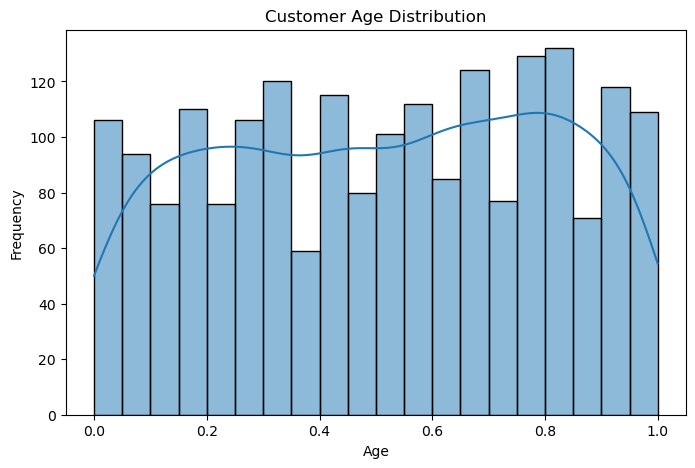

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


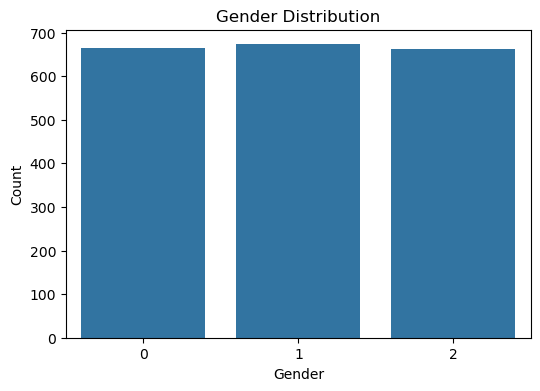

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


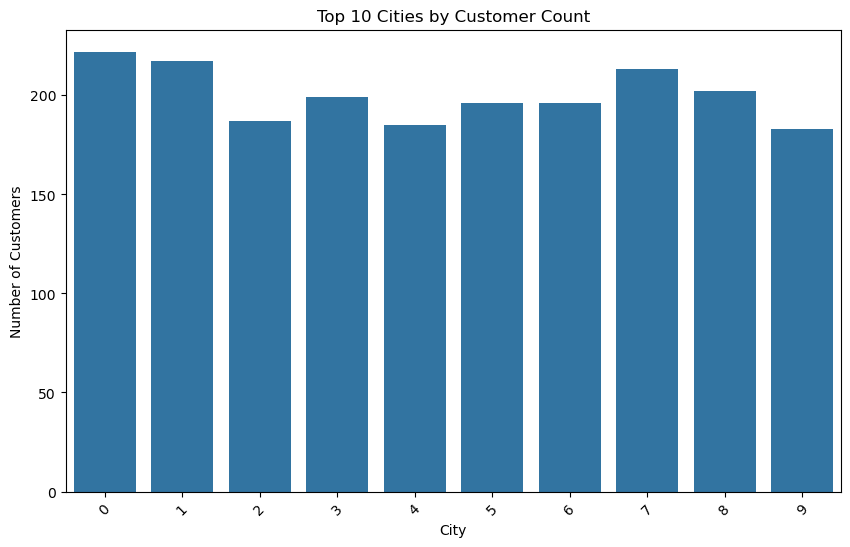

In [51]:
top_cities = df['City'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


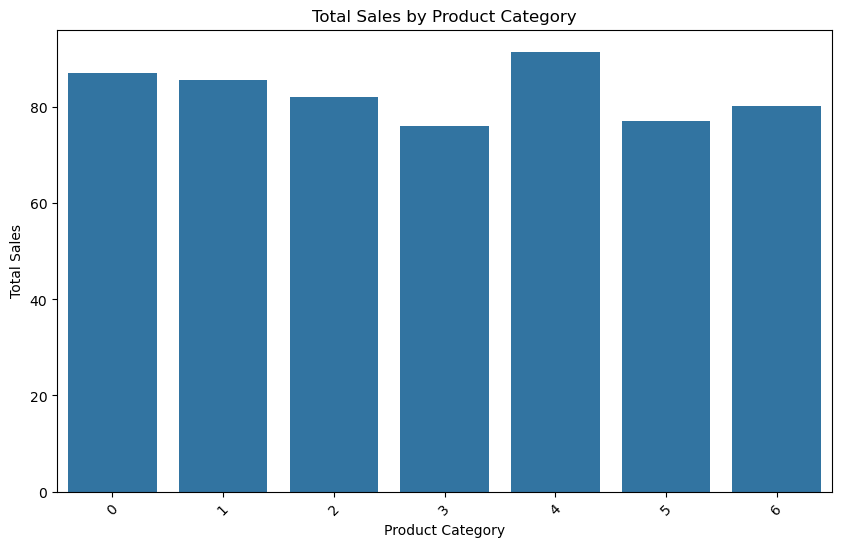

In [52]:
category_sales = df.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


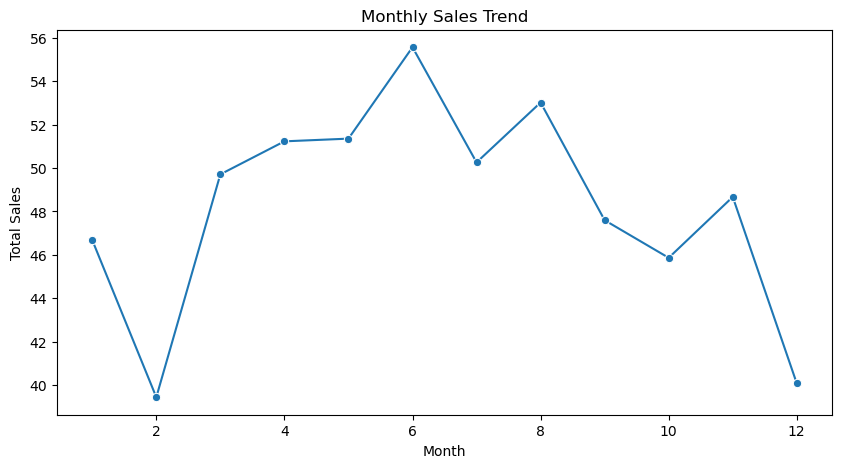

In [53]:
monthly_sales = df.groupby('Month')['TotalAmount'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


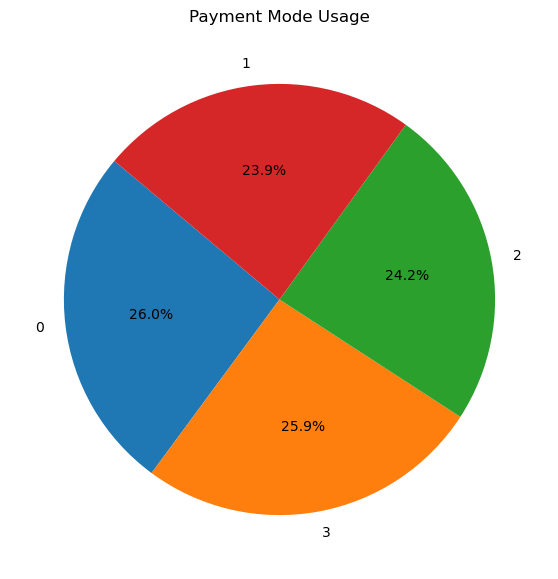

In [54]:
payment_counts = df['PaymentMode'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Mode Usage')
plt.show()


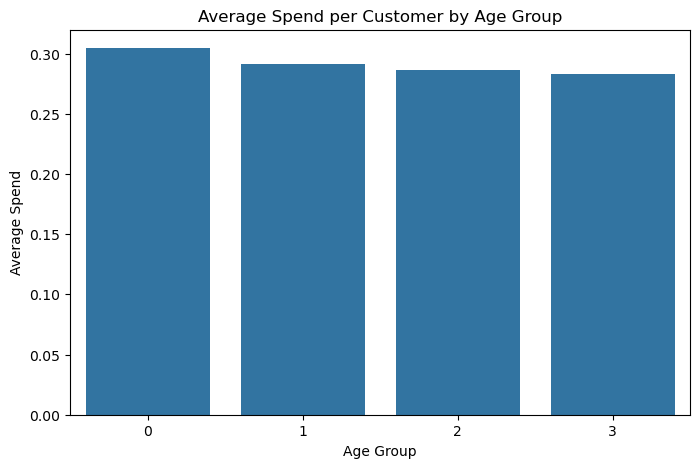

In [55]:
agegroup_spend = df.groupby('AgeGroup')['TotalAmount'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=agegroup_spend.index, y=agegroup_spend.values)
plt.title('Average Spend per Customer by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.show()


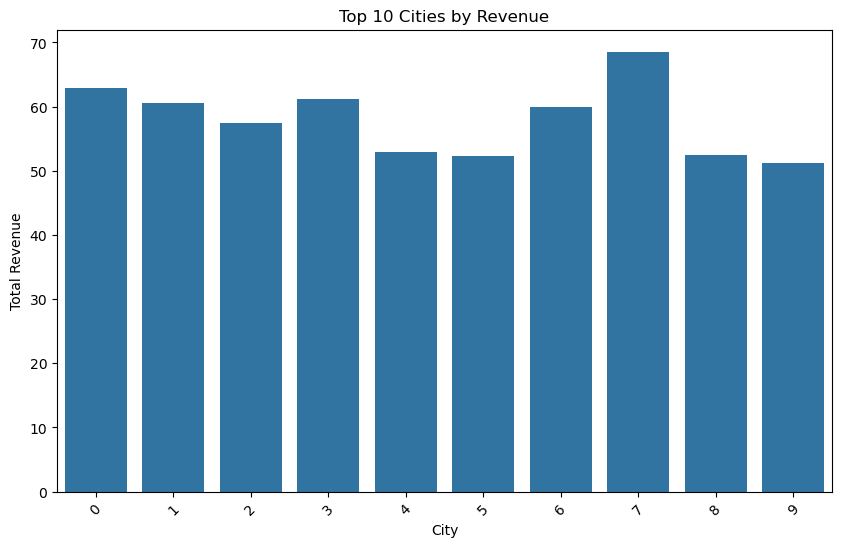

In [56]:
city_revenue = df.groupby('City')['TotalAmount'].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=city_revenue.index, y=city_revenue.values)
plt.title('Top 10 Cities by Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


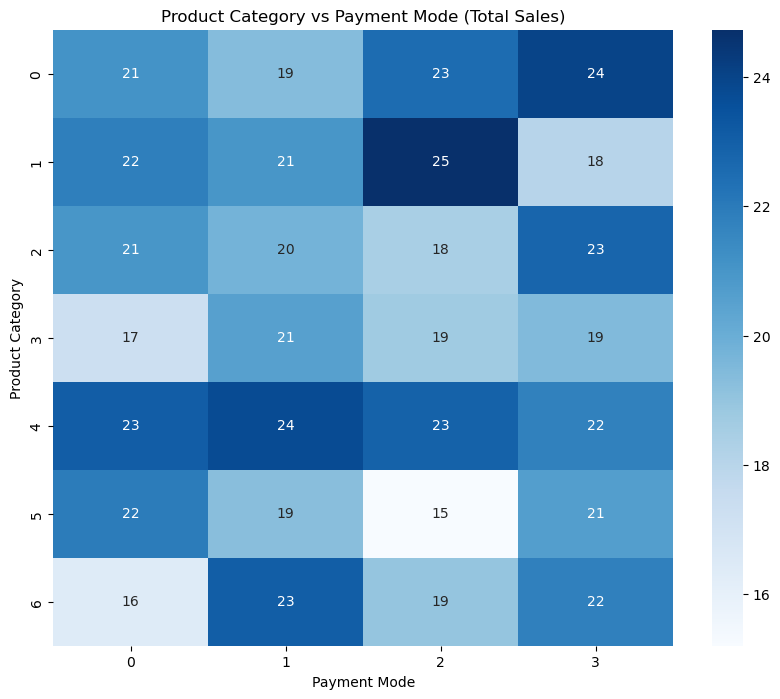

In [57]:
pivot_table = df.pivot_table(values='TotalAmount', index='ProductCategory', columns='PaymentMode', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='Blues')
plt.title('Product Category vs Payment Mode (Total Sales)')
plt.ylabel('Product Category')
plt.xlabel('Payment Mode')
plt.show()
